# Descriptive Analytics
## Specialist Diploma in Data Analytics (SDDA), Semester 2
## INDIVIDUAL ASSIGNMENT I
#### Student Name: Soh Wen Cong
#### Student Number: 10233401E

In [116]:
# import the packages

import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for statistics calculations
import scipy.stats
from statsmodels.stats import weightstats as stests

# for chi square test
from scipy import stats

# for linear regression
from sklearn.linear_model import LinearRegression

# for linear model summary (statsmodel)
import statsmodels.api as sm

# for categorical data encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# for print options
import sys

# for splitting of train and test data set
from sklearn.model_selection import train_test_split

# for evaluation of model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [117]:
# load data set
data = pd.read_csv('./student-grades_1122.csv')

# inspect the first 5 rows
data.head()

,Student ID,Academic Group,CLASS,Math.CA,Math.TEST1,Math.TEST2,Math.TEST3,Math.SemMark,Math.SemGrade,Physics.CA1,...,Writing.ASG2,Writing.CA1,Writing.CA2,Writing.SemMark,Writing.SemGrade,Prog.CA1,Prog.CA2,Prog.ASG1,Prog.SemMark,Prog.Sem Grade
0,198,GrpC,A,85,68,100,90,86,A+,80.9,...,78.0,79.0,70.0,77.0,B+,100.0,75.0,71.5,81.0,A
1,199,GrpC,A,90,95,100,88,93,A+,84.8,...,80.0,86.0,85.0,84.0,A,85.0,65.0,55.0,67.0,C+
2,200,GrpC,A,79,53,29,75,63,C,80.9,...,80.5,78.0,60.0,79.0,B+,95.0,43.3,58.5,65.0,C+
3,201,GrpC,A,85,100,93,58,84,A,85.0,...,74.0,88.0,85.0,78.0,B+,83.3,66.7,68.5,72.0,B
4,202,GrpC,A,90,93,93,68,87,A+,85.9,...,84.4,95.0,85.0,88.0,AD,98.3,85.0,96.0,93.0,A+


In [118]:
# inspect the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Student ID        335 non-null    int64  
 1   Academic Group    335 non-null    object 
 2   CLASS             335 non-null    object 
 3   Math.CA           335 non-null    int64  
 4   Math.TEST1        335 non-null    int64  
 5   Math.TEST2        335 non-null    int64  
 6   Math.TEST3        335 non-null    int64  
 7   Math.SemMark      335 non-null    int64  
 8   Math.SemGrade     335 non-null    object 
 9   Physics.CA1       333 non-null    float64
 10  Physics.CA2       333 non-null    float64
 11  Physics.ASG1      333 non-null    float64
 12  Physics.SemMark   333 non-null    float64
 13  Physics.SemGrade  333 non-null    object 
 14  Writing.ASG1      332 non-null    float64
 15  Writing.ASG2      332 non-null    float64
 16  Writing.CA1       332 non-null    float64
 1

In [119]:
# check cardinality for each loaded variables
data.nunique(dropna=False)  # NaN counted as 1 unique category

Student ID          335
Academic Group        5
CLASS                14
Math.CA              50
Math.TEST1           35
Math.TEST2           61
Math.TEST3           57
Math.SemMark         56
Math.SemGrade        10
Physics.CA1         101
Physics.CA2          21
Physics.ASG1        201
Physics.SemMark      33
Physics.SemGrade     10
Writing.ASG1         69
Writing.ASG2        114
Writing.CA1          34
Writing.CA2          15
Writing.SemMark      35
Writing.SemGrade     11
Prog.CA1             72
Prog.CA2            140
Prog.ASG1           114
Prog.SemMark         69
Prog.Sem Grade       11
dtype: int64

In [120]:
# inspect unique values in each variable
for column in list(data.columns):
    print(f"{column}: {data[column].unique()}\n")

Student ID: [198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 258 259 260 261 262 263 264 266 267 268 269 270 271 272
 273 274 275 276 277 278 279 280 282 283 284 285   1   2   3   4   5   6
   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24
  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42
  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60
  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78
  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96
  97  98 235 257 281 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 265
 286 287 288 289 290 291 292 293 294 29

In [121]:
# check for missing values in each variable
data.isnull().sum()

Student ID          0
Academic Group      0
CLASS               0
Math.CA             0
Math.TEST1          0
Math.TEST2          0
Math.TEST3          0
Math.SemMark        0
Math.SemGrade       0
Physics.CA1         2
Physics.CA2         2
Physics.ASG1        2
Physics.SemMark     2
Physics.SemGrade    2
Writing.ASG1        3
Writing.ASG2        3
Writing.CA1         3
Writing.CA2         3
Writing.SemMark     3
Writing.SemGrade    3
Prog.CA1            3
Prog.CA2            3
Prog.ASG1           3
Prog.SemMark        3
Prog.Sem Grade      3
dtype: int64

In [122]:
# find the percentage of missing values in each variable
data.isnull().mean()

Student ID          0.000000
Academic Group      0.000000
CLASS               0.000000
Math.CA             0.000000
Math.TEST1          0.000000
Math.TEST2          0.000000
Math.TEST3          0.000000
Math.SemMark        0.000000
Math.SemGrade       0.000000
Physics.CA1         0.005970
Physics.CA2         0.005970
Physics.ASG1        0.005970
Physics.SemMark     0.005970
Physics.SemGrade    0.005970
Writing.ASG1        0.008955
Writing.ASG2        0.008955
Writing.CA1         0.008955
Writing.CA2         0.008955
Writing.SemMark     0.008955
Writing.SemGrade    0.008955
Prog.CA1            0.008955
Prog.CA2            0.008955
Prog.ASG1           0.008955
Prog.SemMark        0.008955
Prog.Sem Grade      0.008955
dtype: float64

#### Question 1: Is there a correlation between good performance in one module and another? (20Marks)
###### Hint: Perform suitable technique to deal with missing values. There are multiple ways to deal with missing values, provide reasonable explanation for the technique used. Pick a group of students and determine if there is a correlation between the results of two modules of your choice. How did the correlation compare across students from different academic programs?

In [123]:
# drop data rows with null values
data =  data.dropna()

data.shape

(332, 25)

In [124]:
# check for missing values in each variable
data.isnull().sum()

Student ID          0
Academic Group      0
CLASS               0
Math.CA             0
Math.TEST1          0
Math.TEST2          0
Math.TEST3          0
Math.SemMark        0
Math.SemGrade       0
Physics.CA1         0
Physics.CA2         0
Physics.ASG1        0
Physics.SemMark     0
Physics.SemGrade    0
Writing.ASG1        0
Writing.ASG2        0
Writing.CA1         0
Writing.CA2         0
Writing.SemMark     0
Writing.SemGrade    0
Prog.CA1            0
Prog.CA2            0
Prog.ASG1           0
Prog.SemMark        0
Prog.Sem Grade      0
dtype: int64

In [125]:
# create a new dataframe with GrpC students
data_GrpC = data[data['Academic Group'] == 'GrpC']

data_GrpC.head()

,Student ID,Academic Group,CLASS,Math.CA,Math.TEST1,Math.TEST2,Math.TEST3,Math.SemMark,Math.SemGrade,Physics.CA1,...,Writing.ASG2,Writing.CA1,Writing.CA2,Writing.SemMark,Writing.SemGrade,Prog.CA1,Prog.CA2,Prog.ASG1,Prog.SemMark,Prog.Sem Grade
0,198,GrpC,A,85,68,100,90,86,A+,80.9,...,78.0,79.0,70.0,77.0,B+,100.0,75.0,71.5,81.0,A
1,199,GrpC,A,90,95,100,88,93,A+,84.8,...,80.0,86.0,85.0,84.0,A,85.0,65.0,55.0,67.0,C+
2,200,GrpC,A,79,53,29,75,63,C,80.9,...,80.5,78.0,60.0,79.0,B+,95.0,43.3,58.5,65.0,C+
3,201,GrpC,A,85,100,93,58,84,A,85.0,...,74.0,88.0,85.0,78.0,B+,83.3,66.7,68.5,72.0,B
4,202,GrpC,A,90,93,93,68,87,A+,85.9,...,84.4,95.0,85.0,88.0,AD,98.3,85.0,96.0,93.0,A+


Text(0, 0.5, 'Prog.SemMark')

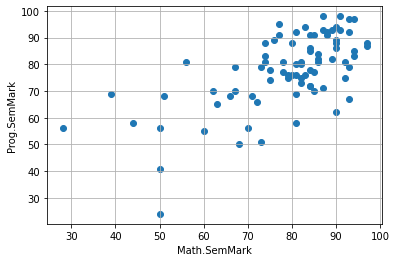

In [126]:
# compare relationship between Math.SemMark and Prog.SemMark of GrpC students
# Scatter plots
plt.scatter(data_GrpC['Math.SemMark'], data_GrpC['Prog.SemMark'])
plt.grid()
plt.xlabel('Math.SemMark')
plt.ylabel('Prog.SemMark')

In [127]:
# compare correlation between Math.SemMark and Prog.SemMark of GrpC students
np.corrcoef(data_GrpC['Math.SemMark'], data_GrpC['Prog.SemMark'])

array([[1.  , 0.65],
       [0.65, 1.  ]])

In [128]:
# compare correlation across students from different academic programs

# create a new dataframe for each academic groups
data_GrpA = data[data['Academic Group'] == 'GrpA']
data_GrpB = data[data['Academic Group'] == 'GrpB']
data_GrpD = data[data['Academic Group'] == 'GrpD']
data_GrpE = data[data['Academic Group'] == 'GrpE']

data_GrpA.head()
# data_GrpB.head()
# data_GrpD.head()
# data_GrpE.head()

,Student ID,Academic Group,CLASS,Math.CA,Math.TEST1,Math.TEST2,Math.TEST3,Math.SemMark,Math.SemGrade,Physics.CA1,...,Writing.ASG2,Writing.CA1,Writing.CA2,Writing.SemMark,Writing.SemGrade,Prog.CA1,Prog.CA2,Prog.ASG1,Prog.SemMark,Prog.Sem Grade
284,99,GrpA,M,85,93,63,63,78,B+,82.3,...,81.5,100.0,70.0,83.0,A,96.7,51.3,93.0,82.0,A
285,100,GrpA,M,100,93,100,98,98,AD,85.5,...,88.0,88.0,90.0,88.0,AD,100.0,98.5,100.0,100.0,AD
286,101,GrpA,M,88,95,90,93,91,A+,83.0,...,78.5,95.0,90.0,83.0,A,100.0,74.2,95.0,90.0,A+
287,102,GrpA,M,93,93,88,75,88,A+,90.7,...,88.5,100.0,85.0,89.0,AD,100.0,56.7,57.0,70.0,B
288,103,GrpA,M,89,85,98,33,79,B+,74.3,...,82.5,84.0,90.0,83.0,A,75.0,80.8,85.0,81.0,A


Text(0, 0.5, 'Prog.SemMark')

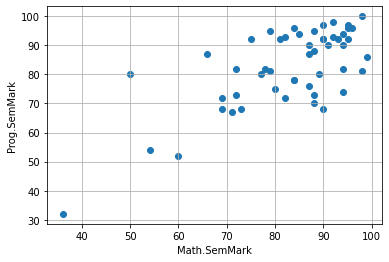

In [129]:
# compare relationship between Math.SemMark and Prog.SemMark of GrpA students
# Scatter plots
plt.scatter(data_GrpA['Math.SemMark'], data_GrpA['Prog.SemMark'])
plt.grid()
plt.xlabel('Math.SemMark')
plt.ylabel('Prog.SemMark')

Text(0, 0.5, 'Prog.SemMark')

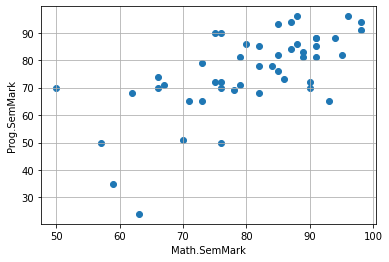

In [130]:
# compare relationship between Math.SemMark and Prog.SemMark of GrpB students
# Scatter plots
plt.scatter(data_GrpB['Math.SemMark'], data_GrpB['Prog.SemMark'])
plt.grid()
plt.xlabel('Math.SemMark')
plt.ylabel('Prog.SemMark')

Text(0, 0.5, 'Prog.SemMark')

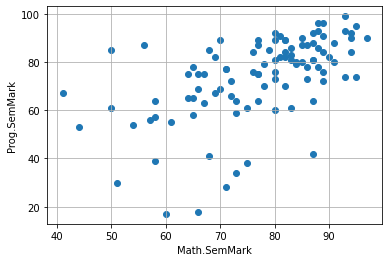

In [131]:
# compare relationship between Math.SemMark and Prog.SemMark of GrpD students
# Scatter plots
plt.scatter(data_GrpD['Math.SemMark'], data_GrpD['Prog.SemMark'])
plt.grid()
plt.xlabel('Math.SemMark')
plt.ylabel('Prog.SemMark')

Text(0, 0.5, 'Prog.SemMark')

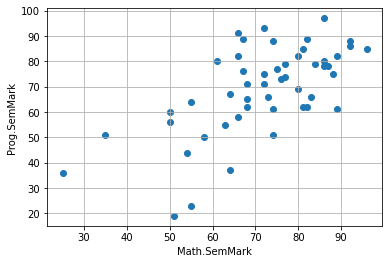

In [132]:
# compare relationship between Math.SemMark and Prog.SemMark of GrpE students
# Scatter plots
plt.scatter(data_GrpE['Math.SemMark'], data_GrpE['Prog.SemMark'])
plt.grid()
plt.xlabel('Math.SemMark')
plt.ylabel('Prog.SemMark')

In [133]:
# compare correlation between Math.SemMark and Prog.SemMark of GrpA students
np.corrcoef(data_GrpA['Math.SemMark'], data_GrpA['Prog.SemMark'])

array([[1. , 0.7],
       [0.7, 1. ]])

In [134]:
# compare correlation between Math.SemMark and Prog.SemMark of GrpB students
np.corrcoef(data_GrpB['Math.SemMark'], data_GrpB['Prog.SemMark'])

array([[1.  , 0.66],
       [0.66, 1.  ]])

In [135]:
# compare correlation between Math.SemMark and Prog.SemMark of GrpD students
np.corrcoef(data_GrpD['Math.SemMark'], data_GrpD['Prog.SemMark'])

array([[1.  , 0.55],
       [0.55, 1.  ]])

In [136]:
# compare correlation between Math.SemMark and Prog.SemMark of GrpE students
np.corrcoef(data_GrpE['Math.SemMark'], data_GrpE['Prog.SemMark'])

array([[1.  , 0.64],
       [0.64, 1.  ]])

#### Question 1
Ans:<br> 
The amount of missing values in the data set in each variable is less than 1%, with the highest being 0.896%. As they are not a significant proportion of the entire data set, the missing data are dropped from the data set.<br><br>
I have picked GrpC students to compare the correlation between Math and Programming modules. The correlation coefficent is 0.648. This suggests that there is a positive correlation between Math and Programming modules for GrpC students.<br><br>
Next, I proceeded to compared the correlation between Math and Programming modules for GrpA, GrpB, GrpD and GrpE students. The correlation coefficent ranges from 0.553 to 0.702. This suggests that there is a positive correlation between Math and Programming modules for all groups of students.

#### Question 2: Is the distribution of marks similar across academic groups? Is there a particular academic group that fared better? (15Marks)
###### Hint: Pick one module to compare across different academic programs. Comment on the central tendency and dispersion, and distribution across different groups taking the same module.

In [137]:
# central tendencies (mean & median) and measure of distribution (std dev) of Math.SemMark for various academic groups

print(f"GrpA - mean: {np.mean(data_GrpA['Math.SemMark']):.2f}, median: {np.median(data_GrpA['Math.SemMark']):.2f}, standard deviation: {np.std(data_GrpA['Math.SemMark']):.2f}")
print(f"GrpB - mean: {np.mean(data_GrpB['Math.SemMark']):.2f}, median: {np.median(data_GrpB['Math.SemMark']):.2f}, standard deviation: {np.std(data_GrpB['Math.SemMark']):.2f}")
print(f"GrpC - mean: {np.mean(data_GrpC['Math.SemMark']):.2f}, median: {np.median(data_GrpC['Math.SemMark']):.2f}, standard deviation: {np.std(data_GrpC['Math.SemMark']):.2f}")
print(f"GrpD - mean: {np.mean(data_GrpD['Math.SemMark']):.2f}, median: {np.median(data_GrpD['Math.SemMark']):.2f}, standard deviation: {np.std(data_GrpD['Math.SemMark']):.2f}")
print(f"GrpE - mean: {np.mean(data_GrpE['Math.SemMark']):.2f}, median: {np.median(data_GrpE['Math.SemMark']):.2f}, standard deviation: {np.std(data_GrpE['Math.SemMark']):.2f}")

GrpA - mean: 82.82, median: 87.00, standard deviation: 12.92
GrpB - mean: 80.50, median: 82.00, standard deviation: 11.31
GrpC - mean: 78.67, median: 82.00, standard deviation: 13.76
GrpD - mean: 76.92, median: 80.00, standard deviation: 12.35
GrpE - mean: 71.62, median: 73.50, standard deviation: 14.48


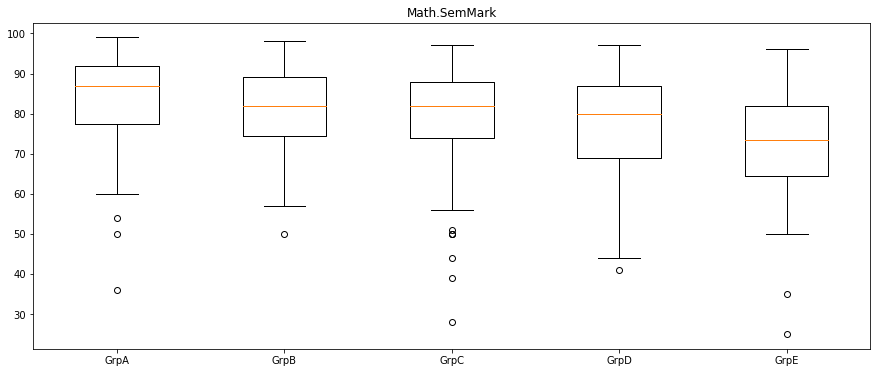

In [138]:
# box and whisker plot of Math.SemMark for various academic groups

# define figure size 
plt.figure(figsize=(15,6))

# box plot
plt.boxplot([data_GrpA['Math.SemMark'], data_GrpB['Math.SemMark'], data_GrpC['Math.SemMark'], data_GrpD['Math.SemMark'], 
             data_GrpE['Math.SemMark']], labels=['GrpA', 'GrpB','GrpC','GrpD','GrpE'])
plt.title('Math.SemMark')
plt.show()

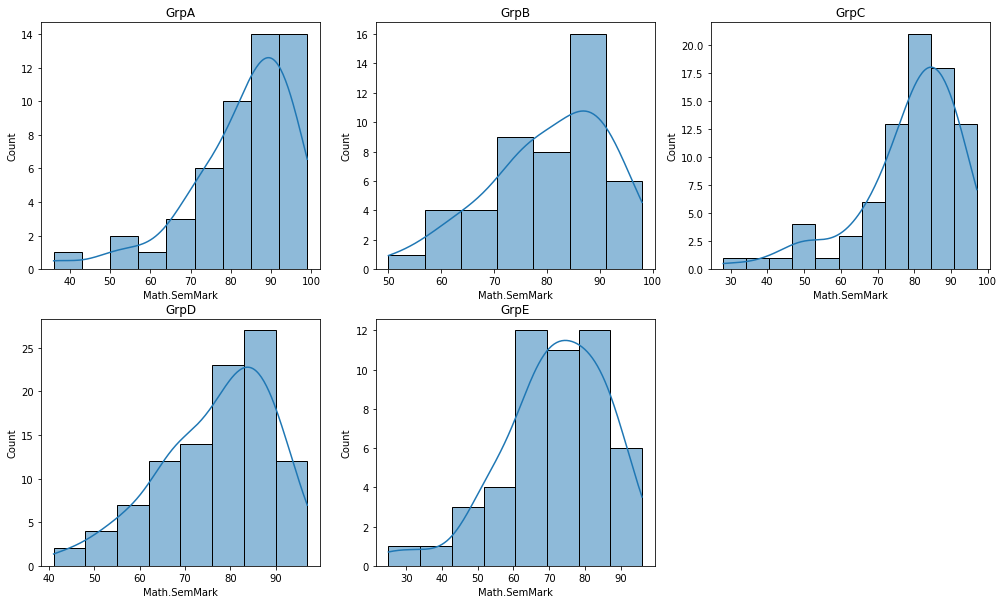

In [139]:
# histogram of Math.SemMark for various academic groups

# define figure size
plt.figure(figsize=(17,10))

plt.subplot(2, 3, 1)
sns.histplot(data_GrpA['Math.SemMark'], kde=True)
plt.title('GrpA')

plt.subplot(2, 3, 2)
sns.histplot(data_GrpB['Math.SemMark'], kde=True)
plt.title('GrpB')

plt.subplot(2, 3, 3)
sns.histplot(data_GrpC['Math.SemMark'], kde=True)
plt.title('GrpC')

plt.subplot(2, 3, 4)
sns.histplot(data_GrpD['Math.SemMark'], kde=True)
plt.title('GrpD')

plt.subplot(2, 3, 5)
sns.histplot(data_GrpE['Math.SemMark'], kde=True)
plt.title('GrpE')

plt.show()

#### Question 2
Ans:<br>
I have picked Math module to be compared across different academic group.<br><br>
From the histograms, the data are left-skewed for all academic groups. This means that the mean are smaller than the median. This further suggests that the outliers are to the left. <br><br>
From the calculations, GrpA students have the highest mean and median values of 82.82 and 87.00 respectively. GrpA students have a standard deviation of 12.92.
GrpE students on the other hand, have the lowest mean and median values of 71.62 and 73.50 respectively. They have the largest standard deviation of 14.48.<br><br>
From the box and whisker plots, it is observed that GrpA students have the highest maximum marks, upper quartile, median, lower quartile and minimum marks, whereas GrpE students have the lowest maximum marks, upper quartile, median, lower quartile and minimum marks (outliers considered).<br><br>
Hence, GrpA students fared better than the rest of the academic groups. 

#### Question 3: Students from GrpA consistently perform better. Is that a fair statement? Use hypothesis testing to prove or disprove this statement. (15Marks)
###### Hint: Set a suitable significance level and use an appropriate hypothesis test to compare GrpA students results to the rest of the students.

In [140]:
# create a new column, Avg.SemMark, for the overall average SemMark of all modules for each students
data['Avg.SemMark'] = (data['Math.SemMark'] + data['Physics.SemMark'] + data['Writing.SemMark'] + data['Prog.SemMark'])/4

data.head()

,Student ID,Academic Group,CLASS,Math.CA,Math.TEST1,Math.TEST2,Math.TEST3,Math.SemMark,Math.SemGrade,Physics.CA1,...,Writing.CA1,Writing.CA2,Writing.SemMark,Writing.SemGrade,Prog.CA1,Prog.CA2,Prog.ASG1,Prog.SemMark,Prog.Sem Grade,Avg.SemMark
0,198,GrpC,A,85,68,100,90,86,A+,80.9,...,79.0,70.0,77.0,B+,100.0,75.0,71.5,81.0,A,80.75
1,199,GrpC,A,90,95,100,88,93,A+,84.8,...,86.0,85.0,84.0,A,85.0,65.0,55.0,67.0,C+,81.25
2,200,GrpC,A,79,53,29,75,63,C,80.9,...,78.0,60.0,79.0,B+,95.0,43.3,58.5,65.0,C+,70.50
3,201,GrpC,A,85,100,93,58,84,A,85.0,...,88.0,85.0,78.0,B+,83.3,66.7,68.5,72.0,B,77.50
4,202,GrpC,A,90,93,93,68,87,A+,85.9,...,95.0,85.0,88.0,AD,98.3,85.0,96.0,93.0,A+,89.00


In [141]:
# update the dataframe of each academic groups with the updated data
data_GrpA = data[data['Academic Group'] == 'GrpA']
data_GrpB = data[data['Academic Group'] == 'GrpB']
data_GrpC = data[data['Academic Group'] == 'GrpC']
data_GrpD = data[data['Academic Group'] == 'GrpD']
data_GrpE = data[data['Academic Group'] == 'GrpE']

data_GrpA.head()
# data_GrpB.head()
# data_GrpC.head()
# data_GrpD.head()
# data_GrpE.head()

,Student ID,Academic Group,CLASS,Math.CA,Math.TEST1,Math.TEST2,Math.TEST3,Math.SemMark,Math.SemGrade,Physics.CA1,...,Writing.CA1,Writing.CA2,Writing.SemMark,Writing.SemGrade,Prog.CA1,Prog.CA2,Prog.ASG1,Prog.SemMark,Prog.Sem Grade,Avg.SemMark
284,99,GrpA,M,85,93,63,63,78,B+,82.3,...,100.0,70.0,83.0,A,96.7,51.3,93.0,82.0,A,79.50
285,100,GrpA,M,100,93,100,98,98,AD,85.5,...,88.0,90.0,88.0,AD,100.0,98.5,100.0,100.0,AD,93.00
286,101,GrpA,M,88,95,90,93,91,A+,83.0,...,95.0,90.0,83.0,A,100.0,74.2,95.0,90.0,A+,84.50
287,102,GrpA,M,93,93,88,75,88,A+,90.7,...,100.0,85.0,89.0,AD,100.0,56.7,57.0,70.0,B,84.25
288,103,GrpA,M,89,85,98,33,79,B+,74.3,...,84.0,90.0,83.0,A,75.0,80.8,85.0,81.0,A,80.25


In [142]:
# find out the overall average marks of all madules for all students
np.mean(data['Avg.SemMark'])

77.5941265060241

###### Step 1: Construct the null and alternative hypothesis
$H_{0}$ : The overall average mark of GrpA students is 77.5941265060241.<br>
$H_{1}$ : The overall average mark of GrpA students is > 77.5941265060241. 

In [143]:
# null hypothesis
null_hypothesis = 77.5941265060241

###### Step 2: Specify one-tail or two-tail test?
Carry out a one-tail test as the alternative is the the mean is > 77.5941265060241.

###### Step 3 & 4: Level of significance and Critical value

In [144]:
# level of significance
sig_level = 0.05

# critical value
critical_value = scipy.stats.norm.ppf(.95,0,1)  # percent point function (inverse of cumulative distribution function — percentiles)
print(critical_value)

1.6448536269514722


###### Step 5: Calculate test statistic

In [145]:
# calculation of z-statistic
ztest ,pval = stests.ztest(data_GrpA['Avg.SemMark'], alternative = 'larger', x2=None, value=null_hypothesis, ddof = 0)
print(f"p-value is {float(pval)}")
print(f"z-statistic is {float(ztest)}")

p-value is 1.6947238844901633e-05
z-statistic is 4.145586660027121


###### Step 6: Make a decision

In [146]:
if ztest > critical_value:
    print("Reject null hypothesis, in favour of the alternative hypothesis that GrpA students have overall average marks higher than the mean.")
else:
    print("Accept null hypothesis, that the overall average marks of GrpA students is 77.5941265060241.")

Reject null hypothesis, in favour of the alternative hypothesis that GrpA students have overall average marks higher than the mean.


#### Question 3
Ans:<br>
Yes, it is a fair statement to conclude that students from GrpA consistently perform better. Hypothesis test was carried out at a 5% level of significance. It was found out that the z-score (z-statistic) was higher than critical-value, where it fell within the rejection region. Thus, the null hypothesis was rejected and in favour of the alternative hypothesis that GrpA students have overall average marks higher than the mean. 

#### Question 4: Is the distribution of grades independent of the academic program? (15Marks)
###### Hint: Use a suitable chi-square test to examine if grade distribution is indeed independent of the academic program the student is in.

In [147]:
# compute a cross tabulation of Math.SemGrade and Academic Group
pd.crosstab(data['Math.SemGrade'], data['Academic Group'], margins=True, margins_name='Total')

Academic Group,GrpA,GrpB,GrpC,GrpD,GrpE,Total
Math.SemGrade,,,,,,
A,7,5,19,19,8,58
A+,21,18,29,30,9,107
AD,7,4,2,3,1,17
B,4,4,8,10,7,33
B+,5,9,9,12,4,39
C,1,2,3,4,4,14
C+,3,3,4,12,8,30
D,2,1,4,4,4,15
D+,0,2,1,5,3,11


In [148]:
# for Chi-Square Test of Independence, at least 5 samples are required in each cell. 
# from the cross tabulation chart above, since there are fewer than 5 samples in a large number of the cells, 
# we shall group similar grades in order to increase the number of samples in each cell.

# create a new column, Math.SemBand, for grouping of similar Math.SemGrade

# create a list of conditions
conditions = [
    ((data['Math.SemGrade'] == 'AD') | (data['Math.SemGrade'] == 'A+') | (data['Math.SemGrade'] == 'A')),
    ((data['Math.SemGrade'] == 'B+') | (data['Math.SemGrade'] == 'B')),
    ((data['Math.SemGrade'] == 'C+') | (data['Math.SemGrade'] == 'C')),
    ((data['Math.SemGrade'] == 'D+') | (data['Math.SemGrade'] == 'D') | (data['Math.SemGrade'] == 'F'))
    ]

# create a list of the values to be assigned for each condition
values = ['AD/A+/A', 'B+/B', 'C+/C', 'D+/D/F']

# create a new column, Math.SemBand, and use np.select to assign values to it
data['Math.SemBand'] = np.select(conditions, values)

# display updated DataFrame
data.head()

,Student ID,Academic Group,CLASS,Math.CA,Math.TEST1,Math.TEST2,Math.TEST3,Math.SemMark,Math.SemGrade,Physics.CA1,...,Writing.CA2,Writing.SemMark,Writing.SemGrade,Prog.CA1,Prog.CA2,Prog.ASG1,Prog.SemMark,Prog.Sem Grade,Avg.SemMark,Math.SemBand
0,198,GrpC,A,85,68,100,90,86,A+,80.9,...,70.0,77.0,B+,100.0,75.0,71.5,81.0,A,80.75,AD/A+/A
1,199,GrpC,A,90,95,100,88,93,A+,84.8,...,85.0,84.0,A,85.0,65.0,55.0,67.0,C+,81.25,AD/A+/A
2,200,GrpC,A,79,53,29,75,63,C,80.9,...,60.0,79.0,B+,95.0,43.3,58.5,65.0,C+,70.50,C+/C
3,201,GrpC,A,85,100,93,58,84,A,85.0,...,85.0,78.0,B+,83.3,66.7,68.5,72.0,B,77.50,AD/A+/A
4,202,GrpC,A,90,93,93,68,87,A+,85.9,...,85.0,88.0,AD,98.3,85.0,96.0,93.0,A+,89.00,AD/A+/A


In [149]:
# compute a cross tabulation of Math.SemBand and Academic Group
pd.crosstab(data['Math.SemBand'], data['Academic Group'], margins=True, margins_name='Total')

Academic Group,GrpA,GrpB,GrpC,GrpD,GrpE,Total
Math.SemBand,,,,,,
AD/A+/A,35,27,50,52,18,182
B+/B,9,13,17,22,11,72
C+/C,4,5,7,16,12,44
D+/D/F,3,3,8,11,9,34
Total,51,48,82,101,50,332


###### Step 1: Construct the null and alternative hypothesis
$H_{0}$ : Among all students, distribution of grades and academic program are independent.<br>
$H_{1}$ : Among all students, distribution of grades and academic program are associated.

In [150]:
data_msb_ag = [[35,27,50,52,18],
              [9,13,17,22,11],
              [4,5,7,16,12],
              [3,3,8,11,9]]

In [151]:
# level of significance
sig_level = 0.05

###### Step 2: Prepare
We use the **chi-square test-of-independence** because there is one sample with two response variables.
<br>
Check that all conditions are met:
- 1. Random sample
- 2. Independent measurements
- 3. Large sample such that at least 5 in each cell.

<br> 
P-value would be calculated by the program. 

###### Step 3: Compute

In [152]:
# Use help(stats.chi2_contingency) to find how many return values are there and what they are.

# chisquare test and pass in the appropriate parameters 
chi2, pval, dof, expected_obs = stats.chi2_contingency(data_msb_ag)
print(f"chisq stat: {chi2} \np-value: {pval} \ndegree of freedom: {dof}\nexpected_count:{expected_obs}")

chisq stat: 19.213762361046843 
p-value: 0.08349867817072279 
degree of freedom: 12
expected_count:[[27.96 26.31 44.95 55.37 27.41]
 [11.06 10.41 17.78 21.9  10.84]
 [ 6.76  6.36 10.87 13.39  6.63]
 [ 5.22  4.92  8.4  10.34  5.12]]


###### Step 4: Intepret
<br>The chi-square statistic $X^2$ of the chi-square $(\chi^2)$ distribution is 19.21.
<br>The degree of freedom: (ncol - 1) x (nrow -1) = 4 x 3 = 12
<br>The p-value: > 0.05

Using p-value of the chisquare statistic:

- if $\text{pval} < \alpha$, then there is evidence to reject the null hypothesis, in favor of the alternative hypothesis ($H_1$).
- if $\text{pval} > \alpha$, then there is insufficient evidence to reject the null hypothesis

In [153]:
if pval < sig_level:
    print("Reject null hypothesis in favor of the alternative that distribution of grades and academic program are associated.")
else: 
    print("Accept null hypothesis that distribution of grades and academic program are independent")

Accept null hypothesis that distribution of grades and academic program are independent


#### Question 4
Ans:<br>
Chi-square test for independence is used to examine if distribution of Math grades is independent of the academic program the student is in. As calculated p-value (0.083) is higher than the level of significance (0.05), there is insufficient evidence to reject the null hypothesis, and thus can conclude that the distribution of grades are independent of the academic program the student is in.

#### Question 5: What is the breakdown of each component to the final SemMark? For example, CA, Test 1, Test 2 and Test 3 contribute 40%, 20%, 20% and 20% respectively to the final semester mark for Math (Math.SemMark). (15 Marks)
###### Hint: Pick one module and using linear regression, find the contribution of each component toward the final Semester mark. Explain using the statsmodel summary table to support your findings.

In [154]:
# Method 1: Multi linear regression

# assign data set

# assign data for Math.CA, Math.TEST1, Math.TEST2, Math.TEST3 to X
X = data.loc[:,["Math.CA", "Math.TEST1", "Math.TEST2", "Math.TEST3"]].values

# assign data for Math.SemMark to y
y = data.loc[:,["Math.SemMark"]].values

print(X)
print(y)

[[ 85  68 100  90]
 [ 90  95 100  88]
 [ 79  53  29  75]
 ...
 [ 85  68  70  55]
 [ 88  95 100  78]
 [ 81 100  97  78]]
[[86]
 [93]
 [63]
 [84]
 [87]
 [90]
 [93]
 [81]
 [82]
 [83]
 [92]
 [93]
 [67]
 [86]
 [79]
 [70]
 [90]
 [94]
 [82]
 [81]
 [94]
 [77]
 [84]
 [80]
 [78]
 [81]
 [97]
 [88]
 [82]
 [73]
 [77]
 [85]
 [44]
 [86]
 [39]
 [78]
 [85]
 [82]
 [56]
 [90]
 [89]
 [89]
 [71]
 [72]
 [97]
 [84]
 [79]
 [74]
 [84]
 [94]
 [84]
 [74]
 [91]
 [80]
 [88]
 [75]
 [85]
 [50]
 [74]
 [67]
 [90]
 [73]
 [66]
 [60]
 [68]
 [87]
 [62]
 [92]
 [91]
 [84]
 [76]
 [81]
 [87]
 [51]
 [28]
 [75]
 [81]
 [83]
 [50]
 [93]
 [50]
 [90]
 [93]
 [82]
 [80]
 [82]
 [87]
 [76]
 [72]
 [61]
 [51]
 [90]
 [56]
 [88]
 [85]
 [64]
 [82]
 [95]
 [94]
 [81]
 [54]
 [85]
 [89]
 [65]
 [77]
 [69]
 [57]
 [88]
 [76]
 [44]
 [66]
 [86]
 [78]
 [77]
 [87]
 [58]
 [80]
 [50]
 [89]
 [67]
 [41]
 [70]
 [75]
 [69]
 [67]
 [68]
 [83]
 [83]
 [85]
 [80]
 [50]
 [93]
 [87]
 [94]
 [87]
 [65]
 [84]
 [75]
 [60]
 [88]
 [58]
 [77]
 [87]
 [94]
 [77]
 [97]
 [77

In [155]:
# train the model

# create an instance of the linear regression class lm
lm = LinearRegression()

# train it using the training set features (X) followed by dependent variable (y)
lm.fit(X,y)

LinearRegression()

In [156]:
# beta 0 or intercept value
print(lm.intercept_)

# beta_1 and beta_2
print(lm.coef_)

[0.16]
[[0.4 0.2 0.2 0.2]]


###### Equation of model
Therefore, the equation to this multivariate linear regression model is:<br><br>
$$Math.SemMark = 0.1609 + 0.3993 x Math.CA + 0.1994 x Math.TEST1 + 0.1991 x Math.TEST2 + 0.2004 x Math.TEST3$$<br>

In [157]:
# Method 2: Fitting linear regression using statsmodel

# assign data for Math.CA, Math.TEST1, Math.TEST2, Math.TEST3 to X2
X2 = data[["Math.CA", "Math.TEST1", "Math.TEST2", "Math.TEST3"]].values

# Add a column to the data, for statsmodels to do matrix multiplication.
X2 = sm.add_constant(X2)  # if we do not add this constant, y-intercept will be missing when we run

# assign data for Math.SemMark to y2
y2 = data[["Math.SemMark"]].values

print(X2)
print(y2)

[[  1.  85.  68. 100.  90.]
 [  1.  90.  95. 100.  88.]
 [  1.  79.  53.  29.  75.]
 ...
 [  1.  85.  68.  70.  55.]
 [  1.  88.  95. 100.  78.]
 [  1.  81. 100.  97.  78.]]
[[86]
 [93]
 [63]
 [84]
 [87]
 [90]
 [93]
 [81]
 [82]
 [83]
 [92]
 [93]
 [67]
 [86]
 [79]
 [70]
 [90]
 [94]
 [82]
 [81]
 [94]
 [77]
 [84]
 [80]
 [78]
 [81]
 [97]
 [88]
 [82]
 [73]
 [77]
 [85]
 [44]
 [86]
 [39]
 [78]
 [85]
 [82]
 [56]
 [90]
 [89]
 [89]
 [71]
 [72]
 [97]
 [84]
 [79]
 [74]
 [84]
 [94]
 [84]
 [74]
 [91]
 [80]
 [88]
 [75]
 [85]
 [50]
 [74]
 [67]
 [90]
 [73]
 [66]
 [60]
 [68]
 [87]
 [62]
 [92]
 [91]
 [84]
 [76]
 [81]
 [87]
 [51]
 [28]
 [75]
 [81]
 [83]
 [50]
 [93]
 [50]
 [90]
 [93]
 [82]
 [80]
 [82]
 [87]
 [76]
 [72]
 [61]
 [51]
 [90]
 [56]
 [88]
 [85]
 [64]
 [82]
 [95]
 [94]
 [81]
 [54]
 [85]
 [89]
 [65]
 [77]
 [69]
 [57]
 [88]
 [76]
 [44]
 [66]
 [86]
 [78]
 [77]
 [87]
 [58]
 [80]
 [50]
 [89]
 [67]
 [41]
 [70]
 [75]
 [69]
 [67]
 [68]
 [83]
 [83]
 [85]
 [80]
 [50]
 [93]
 [87]
 [94]
 [87]
 [65]
 [84]
 [75

In [158]:
# create ordinary least square (ols) model
model2 = sm.OLS(y2,X2)
model2 = model2.fit()
predictions = model2.predict(X2)

# statsmodel summary 
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.906e+05
Date:                Tue, 03 Jan 2023   Prob (F-statistic):               0.00
Time:                        23:09:23   Log-Likelihood:                -45.749
No. Observations:                 332   AIC:                             101.5
Df Residuals:                     327   BIC:                             120.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1609      0.113      1.427      0.154      -0.061       0.383
x1             0.3993      0.002    222.944      0.000       0.396       0.403
x2             0.1994      0.001    165.404      0.000       0.197       0.202
x3             0.1991      0.001    187.183      0.000       0.197       0.201
x4             0.2004      0.001    216.529      0.000       0.199       0.202
==============================================================================
Omnibus:                      256.400   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.584
Skew:                          -0.040   Prob(JB):                     2.06e-05
Kurtosis:                       1.753   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Equation of model
Using statsmodel method, the equation to this multivariate regression model is:<br><br>
$$Math.SemMark = 0.3993 x Math.CA + 0.1994 x Math.TEST1 + 0.1991 x Math.TEST2 + 0.2004 x Math.TEST3$$<br>
The constant 0.1609 is not statistically significant because its p-value (0.154) is greater than the usual level of significance of 0.05, hence it is not included in the equation of the model. This equation derived using Method 2 (using statsmodel) is more accurate as it did not include the statistically insignificant constant.

#### Question 5
Ans:<br>
I have picked Math module to find the contribution of each component towards the final semester marks using 2 methods, namely multi linear regression and statsmodel. This equation derived using Method 2 (using statsmodel) is more accurate as it did not include the statistically insignificant constant, which states the component contribution as follows:<br>
Math.CA - 39.93%<br>
Math.TEST1 - 19.94%<br>
Math.TEST2 - 19.91%<br>
Math.TEST3 - 20.04%

#### Question 6: If we know a student’s Math, Writing, Physics marks, can we predict the Programming mark? Will knowing the Acad_Grp increase the accuracy of the prediction? (20 Marks)
###### Hint: Perform linear regression on the dataset to produce a model. Examine the data for outliers that could have high influence or leverage. Split the data into train and test set. Perform linear regression on the dataset to produce a model. For categorical data, use encoding before including it in the model. Evaluate the model. 

###### With Academic Group

In [159]:
# assign data set

# assign data for Academic Group, Math.SemMark, Physics.SemMark, Writing.SemMark to X3
X3 = data.loc[:,["Academic Group", "Math.SemMark", "Physics.SemMark", "Writing.SemMark"]].values

# assign data for Prog.SemMark to y3
y3 = data.loc[:,["Prog.SemMark"]].values

print(X3)
print(y3)

[['GrpC' 86 79.0 77.0]
 ['GrpC' 93 81.0 84.0]
 ['GrpC' 63 75.0 79.0]
 ...
 ['GrpA' 73 80.0 81.0]
 ['GrpA' 90 76.0 83.0]
 ['GrpA' 87 78.0 78.0]]
[[ 81.]
 [ 67.]
 [ 65.]
 [ 72.]
 [ 93.]
 [ 62.]
 [ 97.]
 [ 69.]
 [ 73.]
 [ 76.]
 [ 81.]
 [ 79.]
 [ 79.]
 [ 82.]
 [ 76.]
 [ 56.]
 [ 94.]
 [ 85.]
 [ 75.]
 [ 76.]
 [ 97.]
 [ 95.]
 [ 72.]
 [ 88.]
 [ 77.]
 [ 92.]
 [ 88.]
 [ 91.]
 [ 80.]
 [ 79.]
 [ 91.]
 [ 91.]
 [ 58.]
 [ 84.]
 [ 69.]
 [ 81.]
 [ 77.]
 [ 81.]
 [ 81.]
 [ 86.]
 [ 93.]
 [ 82.]
 [ 68.]
 [ 66.]
 [ 87.]
 [ 78.]
 [ 75.]
 [ 88.]
 [ 85.]
 [ 83.]
 [ 91.]
 [ 81.]
 [ 98.]
 [ 76.]
 [ 92.]
 [ 74.]
 [ 70.]
 [ 56.]
 [ 83.]
 [ 70.]
 [ 89.]
 [ 51.]
 [ 68.]
 [ 55.]
 [ 50.]
 [ 98.]
 [ 70.]
 [ 75.]
 [ 93.]
 [ 86.]
 [ 89.]
 [ 58.]
 [ 71.]
 [ 68.]
 [ 56.]
 [ 78.]
 [ 80.]
 [ 94.]
 [ 41.]
 [ 92.]
 [ 24.]
 [ 88.]
 [ 93.]
 [ 89.]
 [ 89.]
 [ 82.]
 [ 81.]
 [ 76.]
 [ 72.]
 [ 55.]
 [ 30.]
 [ 82.]
 [ 87.]
 [ 78.]
 [ 87.]
 [ 65.]
 [ 84.]
 [ 95.]
 [ 84.]
 [ 82.]
 [ 54.]
 [ 80.]
 [ 72.]
 [ 58.]
 [ 89.]
 [ 67.]
 [ 56.]


In [160]:
# encode categorical data

# encode Academic Group column 1 (passed in as index 0) as we expect different Academic Group to have different Prog.SemMark
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')  # only encode the 1st column, the rest passthrough
X3_ec = np.array(ct.fit_transform(X3))

# set print to full columns without summarization
np.set_printoptions(threshold=sys.maxsize)

print(X3_ec)

# reset print to default with summarization
np.set_printoptions(threshold=1000)

[[0.0 0.0 1.0 0.0 0.0 86 79.0 77.0]
 [0.0 0.0 1.0 0.0 0.0 93 81.0 84.0]
 [0.0 0.0 1.0 0.0 0.0 63 75.0 79.0]
 [0.0 0.0 1.0 0.0 0.0 84 76.0 78.0]
 [0.0 0.0 1.0 0.0 0.0 87 88.0 88.0]
 [0.0 0.0 1.0 0.0 0.0 90 81.0 76.0]
 [0.0 0.0 1.0 0.0 0.0 93 85.0 80.0]
 [0.0 0.0 1.0 0.0 0.0 81 77.0 80.0]
 [0.0 0.0 1.0 0.0 0.0 82 79.0 81.0]
 [0.0 0.0 1.0 0.0 0.0 83 77.0 79.0]
 [0.0 0.0 1.0 0.0 0.0 92 90.0 85.0]
 [0.0 0.0 1.0 0.0 0.0 93 80.0 82.0]
 [0.0 0.0 1.0 0.0 0.0 67 79.0 78.0]
 [0.0 0.0 1.0 0.0 0.0 86 79.0 83.0]
 [0.0 0.0 1.0 0.0 0.0 79 78.0 84.0]
 [0.0 0.0 1.0 0.0 0.0 70 76.0 81.0]
 [0.0 0.0 1.0 0.0 0.0 90 89.0 84.0]
 [0.0 0.0 1.0 0.0 0.0 94 84.0 77.0]
 [0.0 0.0 1.0 0.0 0.0 82 83.0 80.0]
 [0.0 0.0 1.0 0.0 0.0 81 83.0 79.0]
 [0.0 0.0 1.0 0.0 0.0 94 87.0 88.0]
 [0.0 0.0 1.0 0.0 0.0 77 80.0 85.0]
 [0.0 0.0 1.0 0.0 0.0 84 73.0 85.0]
 [0.0 0.0 1.0 0.0 0.0 80 76.0 80.0]
 [0.0 0.0 1.0 0.0 0.0 78 78.0 80.0]
 [0.0 0.0 1.0 0.0 0.0 81 74.0 80.0]
 [0.0 0.0 1.0 0.0 0.0 97 76.0 85.0]
 [0.0 0.0 1.0 0.0 0.0 88 80.

In [161]:
# split the dataset into Train and Test Set

# split into train test set, 20% for test using train_test_split()
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_ec, y3, test_size = 0.2, random_state = 0)

In [162]:
# train the model

# create an instance of the linear regression class lm3
lm3 = LinearRegression() 

# train it using the training set features (X3) followed by dependent variable (y3)
lm3.fit(X3_train,y3_train)

LinearRegression()

In [163]:
# predicting the Test set results

# predict results using lm3
y3_pred = lm3.predict(X3_test)
np.set_printoptions(precision=2) # precision displays to 2dp

# concantenate vertically. y_pred is horizontal. Use reshape to turn it from horizontal to vertical of len(y) as row number
# and 1 column. Concantenate by axis = 1 (column bind), 0 (row bind)
print(np.concatenate((y3_pred.reshape(len(y3_pred),1), y3_test.reshape(len(y3_test),1)),axis = 1))

[[89.14 98.  ]
 [79.92 70.  ]
 [74.32 74.  ]
 [85.73 96.  ]
 [84.23 90.  ]
 [73.31 56.  ]
 [80.62 80.  ]
 [73.76 63.  ]
 [60.44 24.  ]
 [80.3  80.  ]
 [76.44 79.  ]
 [81.87 42.  ]
 [86.78 98.  ]
 [88.56 72.  ]
 [91.42 99.  ]
 [83.46 76.  ]
 [54.82 41.  ]
 [74.68 62.  ]
 [46.85 56.  ]
 [72.55 73.  ]
 [80.11 81.  ]
 [78.99 76.  ]
 [78.1  81.  ]
 [65.16 75.  ]
 [68.48 91.  ]
 [79.13 70.  ]
 [88.71 88.  ]
 [84.16 92.  ]
 [95.25 91.  ]
 [60.76 58.  ]
 [75.08 88.  ]
 [70.41 70.  ]
 [81.77 95.  ]
 [64.62 35.  ]
 [67.49 71.  ]
 [68.25 77.  ]
 [69.97 55.  ]
 [68.66 70.  ]
 [70.33 69.  ]
 [86.23 86.  ]
 [71.32 58.  ]
 [78.41 69.  ]
 [87.51 97.  ]
 [83.76 89.  ]
 [83.23 98.  ]
 [81.21 72.  ]
 [86.47 70.  ]
 [86.92 93.  ]
 [80.99 94.  ]
 [80.74 95.  ]
 [69.71 87.  ]
 [64.76 88.  ]
 [40.98 23.  ]
 [86.5  78.  ]
 [71.3  79.  ]
 [63.56 61.  ]
 [67.74 65.  ]
 [76.78 38.  ]
 [72.14 77.  ]
 [73.73 50.  ]
 [85.77 85.  ]
 [86.08 86.  ]
 [78.36 73.  ]
 [74.67 78.  ]
 [77.45 84.  ]
 [63.23 93.  ]
 [81.57 73

In [164]:
# Check the coefficients and R-squared value

# beta 0 or intercept value
print(lm3.intercept_)

# All the coefficients of the independent variables for GrpA, GrpB, GrpC, GrpD, GrpE, Math.SemMark, Physics.SemMark, Writing.SemMark
print(lm3.coef_)

# R-squared value of the model
print(lm3.score(X3_train, y3_train))

[-41.55]
[[ 1.45  0.93  0.86 -0.37 -2.87  0.48  0.42  0.6 ]]
0.5185273559266503


###### Equation of model
Therefore, the equation of our simple linear regression model is:<br><br>
$$Prog.SemMark = -41.55 + 1.45 x GrpA + 0.93 x GrpB + 0.86 x GrpC - 0.37 x GrpD -2.87 x GrpE + 0.48 x Math.SemMark + 0.42 x Physics.SemMark + 0.6 x Writing.SemMark$$<br>
The $R^2$ value for this data is 0.519, which means 51.9% of the Prog.SemMark variability is explained by Academic Group, Math.SemMark, Physics.SemMark, Writing.SemMark.

In [165]:
# Evaluate the model

# R-squared (higher the better)
print("R-squared: ", r2_score(y3_test, y3_pred))

# Root Mean Square Error (lower error the better)
print("RMSE: ",np.sqrt(mean_squared_error(y3_test, y3_pred)))

# Mean Absolute Error (lower error the better)
print("MAE: ", mean_absolute_error(y3_test, y3_pred))

R-squared:  0.3950784720866374
RMSE:  13.790384881355337
MAE:  10.225605409402675


###### Without Academic Group

In [166]:
# assign data set

# assign data for Math.SemMark, Physics.SemMark, Writing.SemMark to X4
X4 = data.loc[:,["Math.SemMark", "Physics.SemMark", "Writing.SemMark"]].values

# assign data for Prog.SemMark to y4
y4 = data.loc[:,["Prog.SemMark"]].values

print(X4)
print(y4)

[[86. 79. 77.]
 [93. 81. 84.]
 [63. 75. 79.]
 [84. 76. 78.]
 [87. 88. 88.]
 [90. 81. 76.]
 [93. 85. 80.]
 [81. 77. 80.]
 [82. 79. 81.]
 [83. 77. 79.]
 [92. 90. 85.]
 [93. 80. 82.]
 [67. 79. 78.]
 [86. 79. 83.]
 [79. 78. 84.]
 [70. 76. 81.]
 [90. 89. 84.]
 [94. 84. 77.]
 [82. 83. 80.]
 [81. 83. 79.]
 [94. 87. 88.]
 [77. 80. 85.]
 [84. 73. 85.]
 [80. 76. 80.]
 [78. 78. 80.]
 [81. 74. 80.]
 [97. 76. 85.]
 [88. 80. 79.]
 [82. 76. 78.]
 [73. 73. 78.]
 [77. 76. 78.]
 [85. 80. 80.]
 [44. 72. 71.]
 [86. 76. 80.]
 [39. 76. 76.]
 [78. 80. 82.]
 [85. 71. 81.]
 [82. 77. 84.]
 [56. 71. 80.]
 [90. 77. 82.]
 [89. 80. 84.]
 [89. 75. 84.]
 [71. 76. 80.]
 [72. 83. 78.]
 [97. 81. 82.]
 [84. 77. 79.]
 [79. 78. 76.]
 [74. 80. 75.]
 [84. 81. 75.]
 [94. 80. 86.]
 [84. 83. 82.]
 [74. 73. 80.]
 [91. 84. 85.]
 [80. 81. 78.]
 [88. 82. 81.]
 [75. 77. 78.]
 [85. 76. 80.]
 [50. 64. 70.]
 [74. 81. 80.]
 [67. 77. 75.]
 [90. 78. 81.]
 [73. 73. 75.]
 [66. 79. 80.]
 [60. 81. 80.]
 [68. 75. 84.]
 [87. 86. 77.]
 [62. 87. 

In [167]:
# split the dataset into Train and Test Set

# split into train test set, 20% for test using train_test_split()
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.2, random_state = 0)

In [168]:
# train the model

# create an instance of the linear regression class lm4
lm4 = LinearRegression() 

# train it using the training set features (X4) followed by dependent variable (y4)
lm4.fit(X4_train,y4_train)

LinearRegression()

In [169]:
# predicting the Test set results

# predict results using lm4
y4_pred = lm4.predict(X4_test)
np.set_printoptions(precision=2) # precision displays to 2dp

# concantenate vertically. y_pred is horizontal. Use reshape to turn it from horizontal to vertical of len(y) as row number
# and 1 column. Concantenate by axis = 1 (column bind), 0 (row bind)
print(np.concatenate((y4_pred.reshape(len(y4_pred),1), y4_test.reshape(len(y4_test),1)),axis = 1))

[[88.81 98.  ]
 [79.15 70.  ]
 [73.42 74.  ]
 [85.21 96.  ]
 [84.84 90.  ]
 [72.16 56.  ]
 [81.64 80.  ]
 [74.29 63.  ]
 [58.75 24.  ]
 [79.84 80.  ]
 [76.27 79.  ]
 [82.36 42.  ]
 [85.96 98.  ]
 [89.43 72.  ]
 [91.99 99.  ]
 [82.76 76.  ]
 [52.37 41.  ]
 [77.6  62.  ]
 [44.85 56.  ]
 [73.31 73.  ]
 [79.44 81.  ]
 [79.54 76.  ]
 [78.36 81.  ]
 [65.2  75.  ]
 [71.08 91.  ]
 [78.22 70.  ]
 [88.09 88.  ]
 [83.08 92.  ]
 [95.26 91.  ]
 [63.18 58.  ]
 [78.03 88.  ]
 [69.82 70.  ]
 [82.97 95.  ]
 [63.01 35.  ]
 [66.25 71.  ]
 [68.12 77.  ]
 [68.88 55.  ]
 [67.65 70.  ]
 [70.25 69.  ]
 [86.94 86.  ]
 [71.51 58.  ]
 [77.6  69.  ]
 [87.4  97.  ]
 [83.19 89.  ]
 [83.11 98.  ]
 [80.13 72.  ]
 [85.86 70.  ]
 [86.61 93.  ]
 [80.41 94.  ]
 [79.88 95.  ]
 [70.15 87.  ]
 [67.07 88.  ]
 [43.53 23.  ]
 [85.14 78.  ]
 [70.32 79.  ]
 [63.79 61.  ]
 [66.61 65.  ]
 [77.39 38.  ]
 [72.2  77.  ]
 [72.42 50.  ]
 [85.71 85.  ]
 [89.42 86.  ]
 [78.97 73.  ]
 [77.35 78.  ]
 [78.   84.  ]
 [65.74 93.  ]
 [81.2  73

In [170]:
# Check the coefficients and R-squared value

# beta 0 or intercept value
print(lm4.intercept_)

# All the coefficients of the independent variables for Math.SemMark, Physics.SemMark, Writing.SemMark
print(lm4.coef_)

# R-squared value of the model
print(lm4.score(X4_train, y4_train))

[-45.52]
[[0.5  0.47 0.58]]
0.5112655297759069


###### Equation of model
Therefore, the equation of our simple linear regression model is:<br><br>
$$Prog.SemMark = -45.52 + 0.5 x Math.SemMark + 0.47 x Physics.SemMark + 0.58 x Writing.SemMark$$<br>
The $R^2$ value for this data is 0.511, which means 51.1% of the Prog.SemMark variability is explained by Math.SemMark, Physics.SemMark, Writing.SemMark.

In [171]:
# Evaluate the model

# R-squared (higher the better)
print("R-squared: ", r2_score(y4_test, y4_pred))

# Root Mean Square Error (lower error the better)
print("RMSE: ",np.sqrt(mean_squared_error(y4_test, y4_pred)))

# Mean Absolute Error (lower error the better)
print("MAE: ", mean_absolute_error(y4_test, y4_pred))

R-squared:  0.41830674640944066
RMSE:  13.523025921030142
MAE:  10.132108395754953


#### Question 6
Ans:<br>
Linear regression was performed on 2 models, 1 with Academic Group data and 1 was without. Both models included Math, Physics and Writing marks as their independent variable and Programming marks as their dependent variable. One hot encoding was also performed on the data set with Academic Group data as they contain categorical data. An equation for the simple linear regression model was generated for each model. With this, we could predict Programming marks, if we know the corresponding Math, Physics and Writing marks.<br><br>
Both models were evaluated. It was found that the model with Academic Group data had lower R-squared value (0.395 vs 0.418), higher root mean square error (13.79 vs 13.52) and higher mean absolute error (10.23 vs 10.13). Hence, knowing Academic Group data does not increase the accuracy of the prediction.